In [2]:
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline

In [25]:
DATA_IN_PATH = './data_in/'
train_data = pd.read_csv('./data_in/train_data_11_15.csv', encoding='utf-8-sig')
print('전체 학습데이터의 개수: {}'.format(len(train_data)))

전체 학습데이터의 개수: 15460


In [26]:
train_length = train_data['review'].astype(str).apply(len)

train_length.head()

0     30
1     72
2    133
3     55
4     93
Name: review, dtype: int64

Text(0, 0.5, 'Number of review')

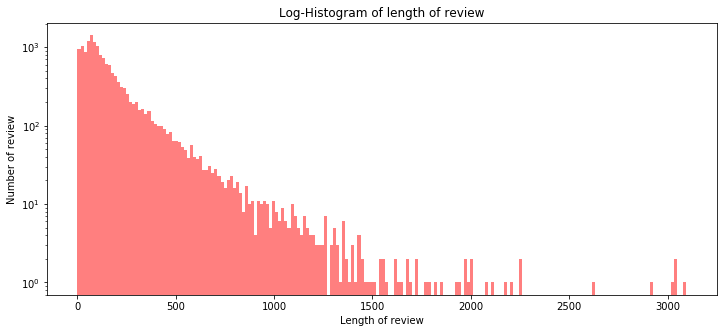

In [27]:
plt.figure(figsize=(12, 5))
# 히스토그램 선언
plt.hist(train_length, bins=200, alpha=0.5, color= 'r', label='word')
plt.yscale('log', nonposy='clip')
# 그래프 제목
plt.title('Log-Histogram of length of review')
# 그래프 x 축 라벨
plt.xlabel('Length of review')
# 그래프 y 축 라벨
plt.ylabel('Number of review')

In [28]:
print('리뷰 길이 최대 값: {}'.format(np.max(train_length)))
print('리뷰 길이 최소 값: {}'.format(np.min(train_length)))
print('리뷰 길이 평균 값: {:.2f}'.format(np.mean(train_length)))
print('리뷰 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('리뷰 길이 중간 값: {}'.format(np.median(train_length)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('리뷰 길이 제 1 사분위: {}'.format(np.percentile(train_length, 25)))
print('리뷰 길이 제 3 사분위: {}'.format(np.percentile(train_length, 75)))

리뷰 길이 최대 값: 3094
리뷰 길이 최소 값: 1
리뷰 길이 평균 값: 177.15
리뷰 길이 표준편차: 209.49
리뷰 길이 중간 값: 110.0
리뷰 길이 제 1 사분위: 60.0
리뷰 길이 제 3 사분위: 215.0


{'whiskers': [<matplotlib.lines.Line2D at 0x1c580a14bc8>,
 'caps': [<matplotlib.lines.Line2D at 0x1c5809dae88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c580a0b708>],
 'medians': [<matplotlib.lines.Line2D at 0x1c5804ed108>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c5804f93c8>],
 'means': [<matplotlib.lines.Line2D at 0x1c580880688>]}

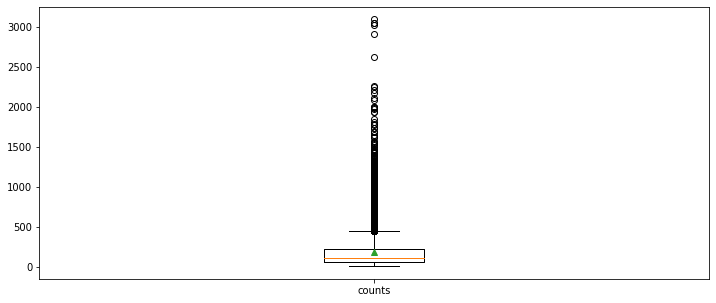

In [29]:
# 박스플롯 생성
plt.figure(figsize=(12, 5))
plt.boxplot(train_length,
             labels=['counts'],
             showmeans=True)

In [30]:
train_review = [review for review in train_data['review'] if type(review) is str]

In [31]:
wordcloud = WordCloud(font_path = DATA_IN_PATH + 'NanumGothic.ttf').generate(' '.join(train_review))

## Check Data imbalanced

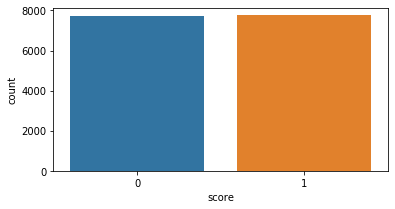

In [32]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(train_data['score'])

In [33]:
print("긍정 리뷰 개수: {}".format(train_data['score'].value_counts()[1]))
print("부정 리뷰 개수: {}".format(train_data['score'].value_counts()[0]))
print("긍정 비율 : {:0.2f} 부정 비율 : {:0.2f}".format(
    len(train_data[train_data['score'] == 1]) / len(train_data), len(train_data[train_data['score'] == 0]) / len(train_data)))

긍정 리뷰 개수: 7749
부정 리뷰 개수: 7711
긍정 비율 : 0.50 부정 비율 : 0.50


In [34]:
train_word_counts = train_data['review'].astype(str).apply(lambda x:len(x.split(' ')))

Text(0, 0.5, 'Number of reviews')

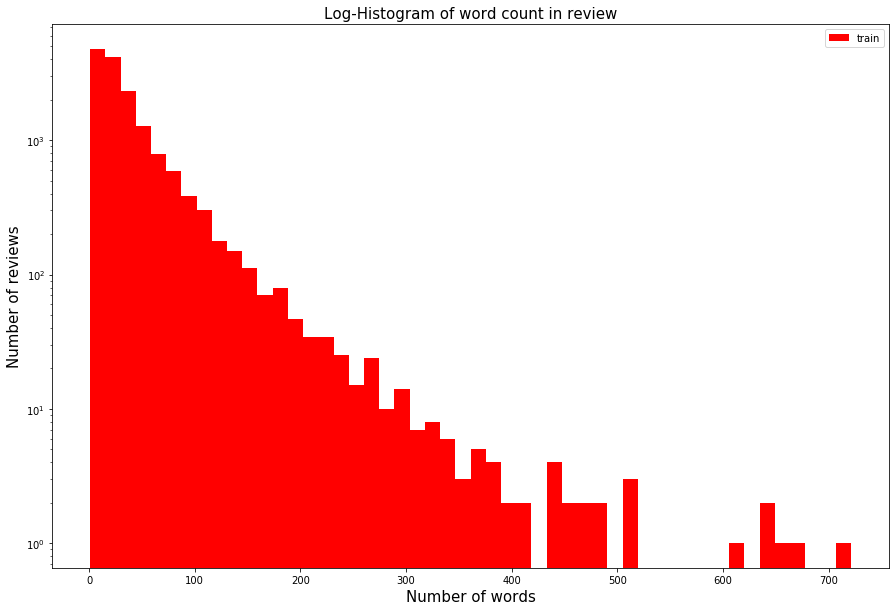

In [35]:
plt.figure(figsize=(15, 10))
plt.hist(train_word_counts, bins=50, facecolor='r',label='train')
plt.title('Log-Histogram of word count in review', fontsize=15)
plt.yscale('log', nonposy='clip')
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Number of reviews', fontsize=15)

In [36]:
print('리뷰 단어 개수 최대 값: {}'.format(np.max(train_word_counts)))
print('리뷰 단어 개수 최소 값: {}'.format(np.min(train_word_counts)))
print('리뷰 단어 개수 평균 값: {:.2f}'.format(np.mean(train_word_counts)))
print('리뷰 단어 개수 표준편차: {:.2f}'.format(np.std(train_word_counts)))

print('리뷰 단어 개수 제 1 사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('리뷰 단어 개수 제 3 사분위: {}'.format(np.percentile(train_word_counts, 75)))

리뷰 단어 개수 최대 값: 721
리뷰 단어 개수 최소 값: 1
리뷰 단어 개수 평균 값: 38.89
리뷰 단어 개수 표준편차: 46.33
리뷰 단어 개수 제 1 사분위: 13.0
리뷰 단어 개수 제 3 사분위: 47.0


## Check special char

In [37]:
qmarks = np.mean(train_data['review'].astype(str).apply(lambda x: '?' in x)) # 물음표가 구두점으로 쓰임
fullstop = np.mean(train_data['review'].astype(str).apply(lambda x: '.' in x)) # 마침표
                  
print('물음표가있는 리뷰: {:.2f}%'.format(qmarks * 100))
print('마침표가 있는 리뷰: {:.2f}%'.format(fullstop * 100))

물음표가있는 리뷰: 12.39%
마침표가 있는 리뷰: 74.30%


### Data preprocessing

In [38]:
import numpy as np
import pandas as pd
import re
import json
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# 특수 문자 제거.
review_text = re.sub("[^가-힣ㄱ-하-ㅣ\\s]", "", train_data['review'][0])
print(review_text)

과카몰리 프라이즈  더블 더블 버거  아보카도 버거


In [39]:
okt = Okt()
review_text = okt.morphs(review_text, stem=True)
print(review_text)

C:\Users\skeks\.conda\envs\nlp_env\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


['과카', '몰리', '프라', '이즈', '더블', '더블', '버거', '아보카도', '버거']


## 불용어 처리

In [40]:
stop_words = set(['은', '는', '이', '가', '하', '아', '것', '들', '의', '있', '되', '수', '보', '주', '등', '한'])
clean_review = [w for w in review_text if not w in stop_words]

In [41]:
stop_words = set(['은', '는', '이', '가', '하', '아', '것', '들','의', '있', '되', '수', '보', '주', '등', '한'])

In [42]:
def preprocessing(review, okt, remove_stopwords = False, stop_words = []):
    # 함수의 인자는 다음과 같다.
    # review : 전처리할 텍스트
    # okt : okt 객체를 반복적으로 생성하지 않고 미리 생성후 인자로 받는다.
    # remove_stopword : 불용어를 제거할지 선택 기본값은 False
    # stop_word : 불용어 사전은 사용자가 직접 입력해야함 기본값은 비어있는 리스트
    
    # 1. 한글 및 공백을 제외한 문자 모두 제거.
    review_text = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]", "", review)
    
    # 2. okt 객체를 활용해서 형태소 단위로 나눈다.
    word_review = okt.morphs(review_text, stem=True)
    
    if remove_stopwords:
        
        # 불용어 제거(선택적)
        word_review = [token for token in word_review if not token in stop_words]
        
   
    return word_review

In [45]:
stop_words = [ '은', '는', '이', '가', '하', '아', '것', '들','의', '있', '되', '수', '보', '주', '등', '한']
okt = Okt()
clean_train_review = []

for review in train_data['review']:
    # 비어있는 데이터에서 멈추지 않도록 string인 경우만 진행
    if type(review) == str:
        clean_train_review.append(preprocessing(review, okt, remove_stopwords = True, stop_words=stop_words))
    else:
        clean_train_review.append([])  #string이 아니면 비어있는 값 추가

In [48]:
test_data = pd.read_csv(DATA_IN_PATH + 'test_data_11_15.csv')

clean_test_review = []

for review in test_data['review']:
    # 비어있는 데이터에서 멈추지 않도록 string인 경우만 진행
    if type(review) == str:
        clean_test_review.append(preprocessing(review, okt, remove_stopwords = True, stop_words=stop_words))
    else:
        clean_test_review.append([])  #string이 아니면 비어있는 값 추가

In [49]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_train_review)
train_sequences = tokenizer.texts_to_sequences(clean_train_review)
test_sequences = tokenizer.texts_to_sequences(clean_test_review)

word_vocab = tokenizer.word_index # 단어 사전 형태

In [51]:
MAX_SEQUENCE_LENGTH = 8 # 문장 최대 길이

train_inputs = pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post') # 학습 데이터를 벡터화
train_labels = np.array(train_data['score']) # 학습 데이터의 라벨

test_inputs = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post') # 테스트 데이터를 벡터화
test_labels = np.array(test_data['score']) # 테스트 데이터의 라벨

## Save data
---

- train data, test data convert to numpy data
- save vocabulary data to json file

In [52]:
DATA_IN_PATH = './data_in/'
TRAIN_INPUT_DATA = 'nsmc_train_input.npy'
TRAIN_LABEL_DATA = 'nsmc_train_label.npy'
TEST_INPUT_DATA = 'nsmc_test_input.npy'
TEST_LABEL_DATA = 'nsmc_test_label.npy'
DATA_CONFIGS = 'data_configs.json'

data_configs = {}

data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab) # vocab size 추가

import os

if not os.path.exists(DATA_IN_PATH):
    os.makedirs(DATA_IN_PATH)

# 전처리 된 학습 데이터를 넘파이 형태로 저장
np.save(open(DATA_IN_PATH + TRAIN_INPUT_DATA, 'wb'), train_inputs)
np.save(open(DATA_IN_PATH + TRAIN_LABEL_DATA, 'wb'), train_labels)

np.save(open(DATA_IN_PATH + TEST_INPUT_DATA, 'wb'), test_inputs)
np.save(open(DATA_IN_PATH + TEST_LABEL_DATA, 'wb'), test_labels)

# 데이터 사전을 json 형태로 저장
json.dump(data_configs, open(DATA_IN_PATH + DATA_CONFIGS, 'w'), ensure_ascii=False)